## Logistic Regression

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Used for binary classification (0 or 1, pass or fail,spam or not)
category classification

In [2]:
import seaborn as sns


In [3]:
df = pd.read_csv('candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [5]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [8]:
duplicates = df[df.duplicated()]
print(duplicates.sum())


competitorname        0
chocolate             0
fruity                0
caramel               0
peanutyalmondy        0
nougat                0
crispedricewafer      0
hard                  0
bar                   0
pluribus              0
sugarpercent        0.0
pricepercent        0.0
winpercent          0.0
dtype: object


In [9]:
print(duplicates.shape)

(0, 13)


In [15]:
df = df[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']]

In [16]:
x = df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent']]
y = df['chocolate']

In [17]:
from sklearn.model_selection import train_test_split
trainingset , testset = train_test_split(df,test_size = 0.2)

In [18]:
train_df = trainingset
test_df = testset

In [19]:
x_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent']]
y_train = train_df['chocolate']
x_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent']]
y_test = test_df['chocolate']

In [20]:
y_test.head()

60    0
3     0
77    1
58    0
43    1
Name: chocolate, dtype: int64

In [21]:
y_train.value_counts()

chocolate
0    42
1    26
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_28668\2554284165.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_df , x= "chocolate",palette="Blues_d" )


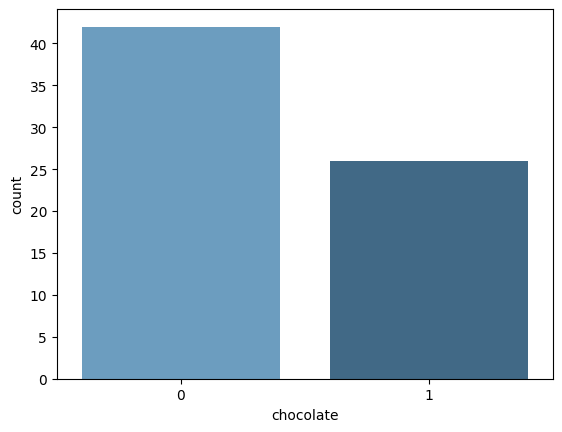

<Figure size 640x480 with 0 Axes>

In [27]:
sns.countplot(data = train_df , x= "chocolate",palette="Blues_d" )
plt.show()
plt.savefig('count_plot')

In [28]:
count_no_choc = len(train_df[train_df['chocolate']==0])
count_choc = len(train_df[train_df['chocolate']==1])
pct_of_no_choc = count_no_choc / (count_no_choc + count_choc)
print("percentage of no chocolate :", pct_of_no_choc*100)
pct_of_choc = count_choc / (count_no_choc +count_choc)
print("percentage of chocolate :", pct_of_choc*100)


percentage of no chocolate : 61.76470588235294
percentage of chocolate : 38.23529411764706


In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [30]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[3 3]
 [2 9]]
